In [1]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_ar = []
for f in glob.glob('result_data/*.out'):
    name = re.match(r'result_data/timedemo_result_(.*)\.out', f)[1]
    with open(f) as file:
        frame = 0
        for line in file:
            line = line.strip()
            if re.match('\d+,', line):
                time, reason = line.split(',')
                time = int(time)
                frame += 1
                data_ar.append({
                    'frame': frame,
                    'name': name,
                    'time': time,
                    'reason': reason
                })
                
data = pd.DataFrame(data_ar)
data

,frame,name,time,reason
0,1,only_render,36138,wipe
1,2,only_render,6103,wipe
2,3,only_render,8591,wipe
3,4,only_render,9337,wipe
4,5,only_render,11649,wipe
...,...,...,...,...
9835,1226,all_contracts,1095702,gamestate 0
9836,1227,all_contracts,1094051,gamestate 0
9837,1228,all_contracts,1096194,gamestate 0
9838,1229,all_contracts,1091324,gamestate 0


In [4]:
data.groupby('name').count()

,frame,time,reason
name,,,
all_contracts,1230,1230,1230
no_contracts,1230,1230,1230
only_math,1230,1230,1230
only_pointers,1230,1230,1230
only_render,1230,1230,1230
only_root,1230,1230,1230
only_sound,1230,1230,1230
only_status_bar,1230,1230,1230


<AxesSubplot:xlabel='frame'>

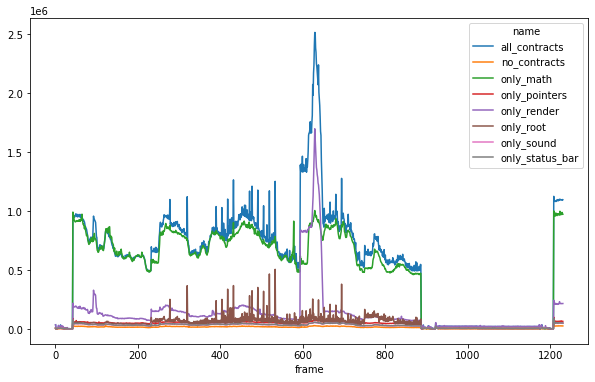

In [28]:
df = data.pivot(values='time', columns=['name'], index='frame')
df.plot(figsize=(10, 6))

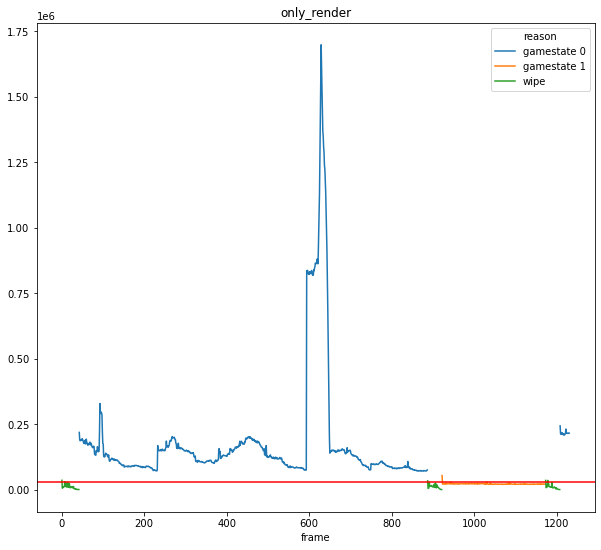

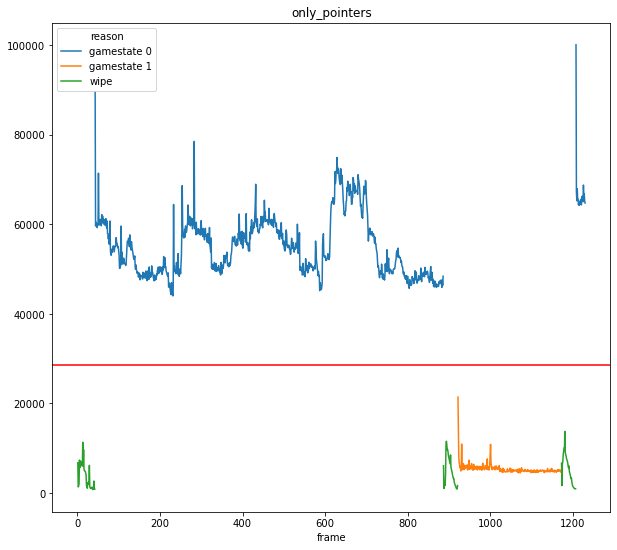

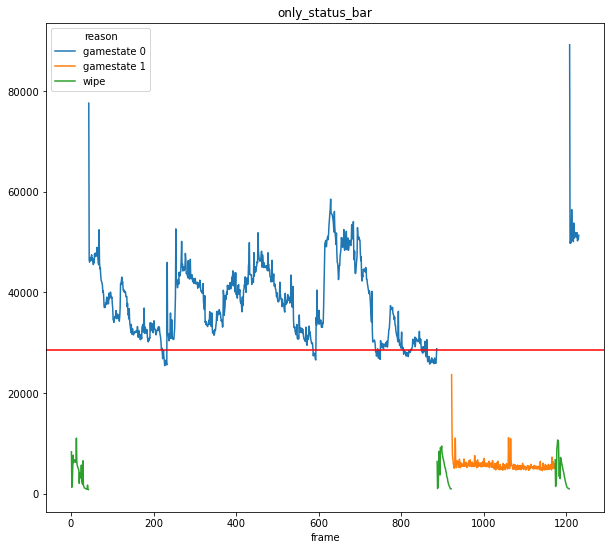

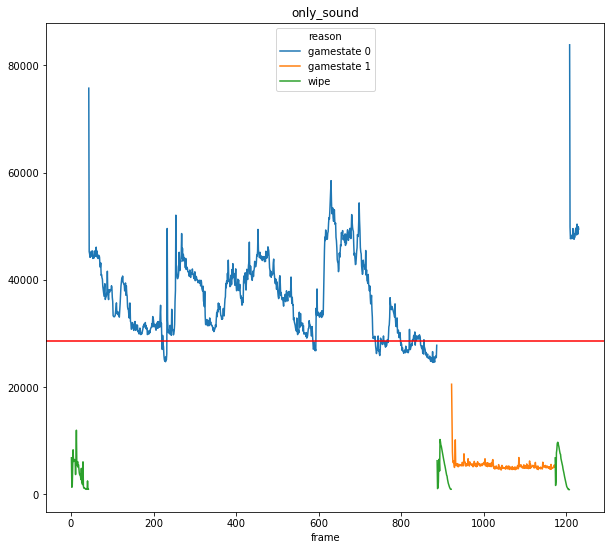

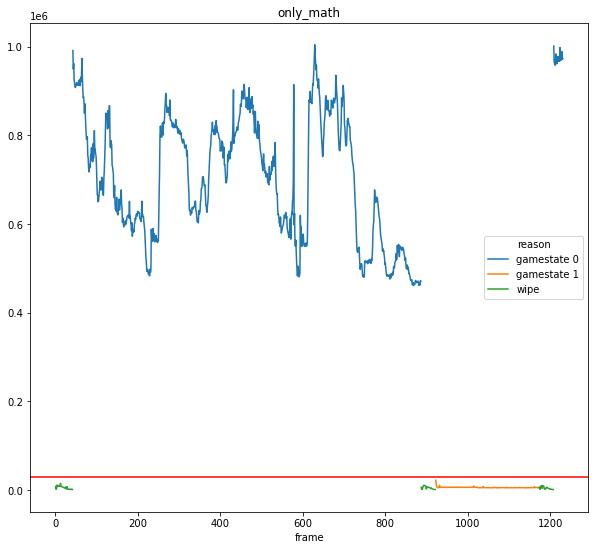

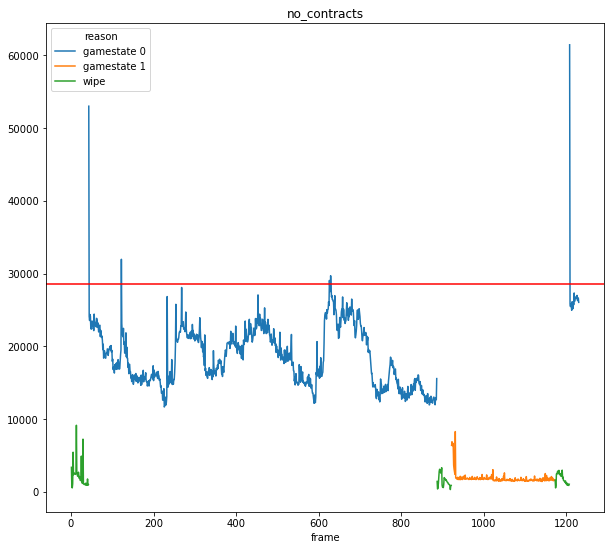

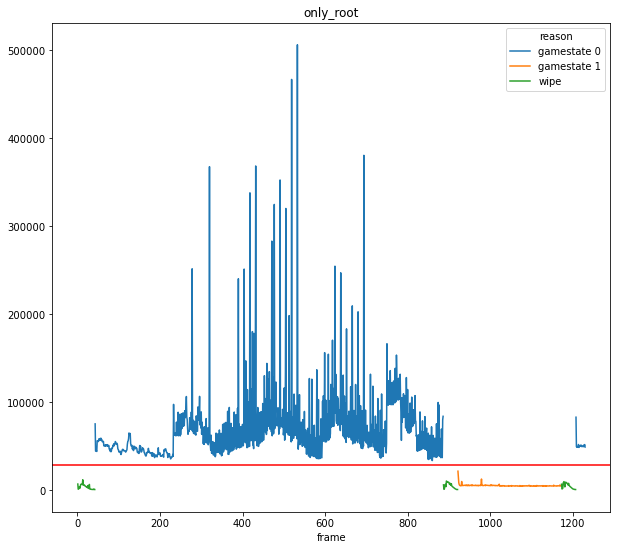

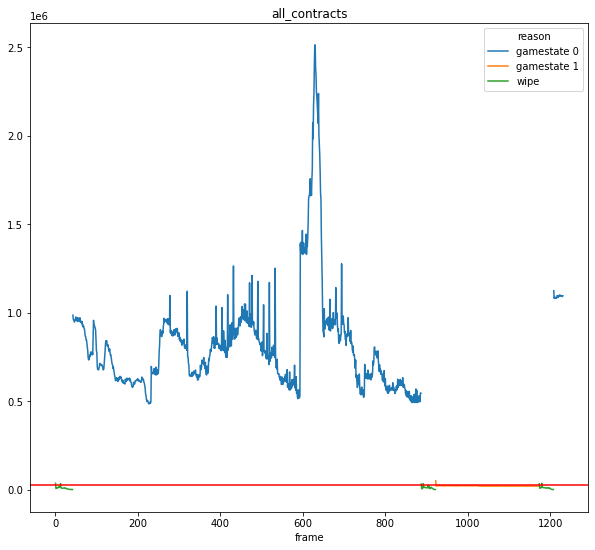

In [35]:
for name in data.name.unique():
    df = data[data['name'] == name]
    df = df.pivot(values='time', columns=['reason'], index='frame')
    df.plot(figsize=(10, 9), title=name)
    plt.axhline(y=1.0 / 35 * (10 ** 6), color='red')

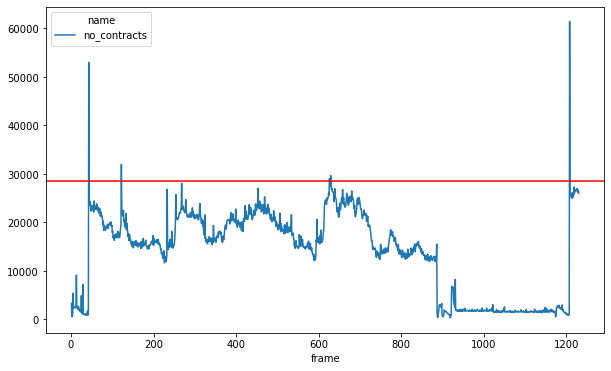

In [34]:
fast = 'no_contracts'
df = data[data['name'] == fast]
df = df.pivot(values='time', columns=['name'], index='frame')
df.plot(figsize=(10, 6))
plt.axhline(y=1.0 / 35 * (10 ** 6), color='red')

<AxesSubplot:xlabel='name'>

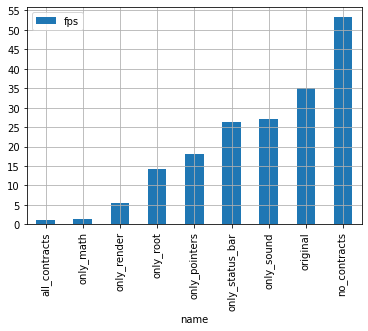

In [91]:
# Actual fps
df = data[data['reason'] == 'gamestate 0'].groupby('name').mean('time').reset_index()
df['fps'] = 1 / df['time'] * (10 ** 6)
df = df.append(pd.DataFrame([{'name': 'original', 'fps': 35}]))
df = df[['name', 'fps']].sort_values('fps')
df.plot.bar(x='name', yticks=range(0, 60, 5), grid=True)